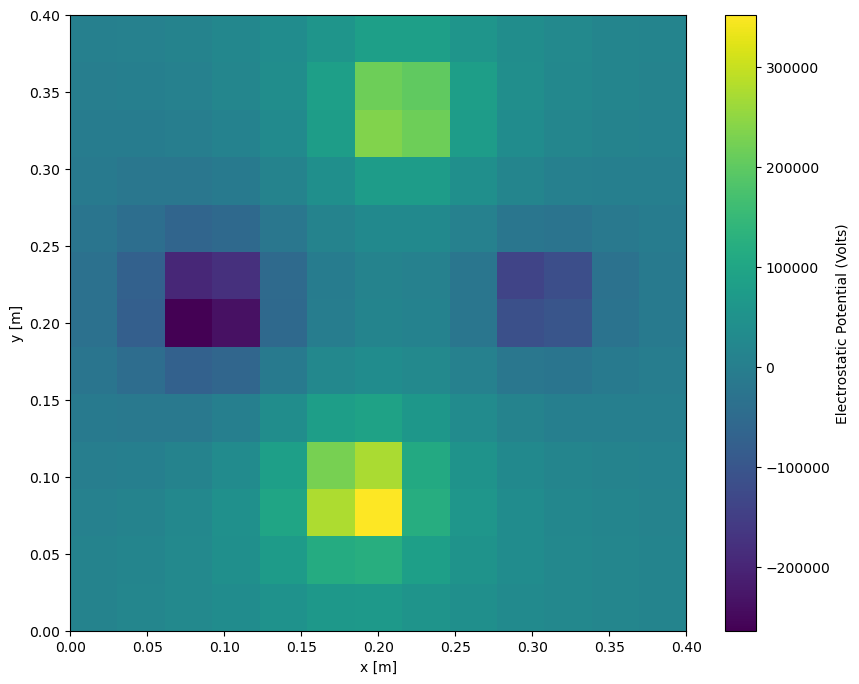

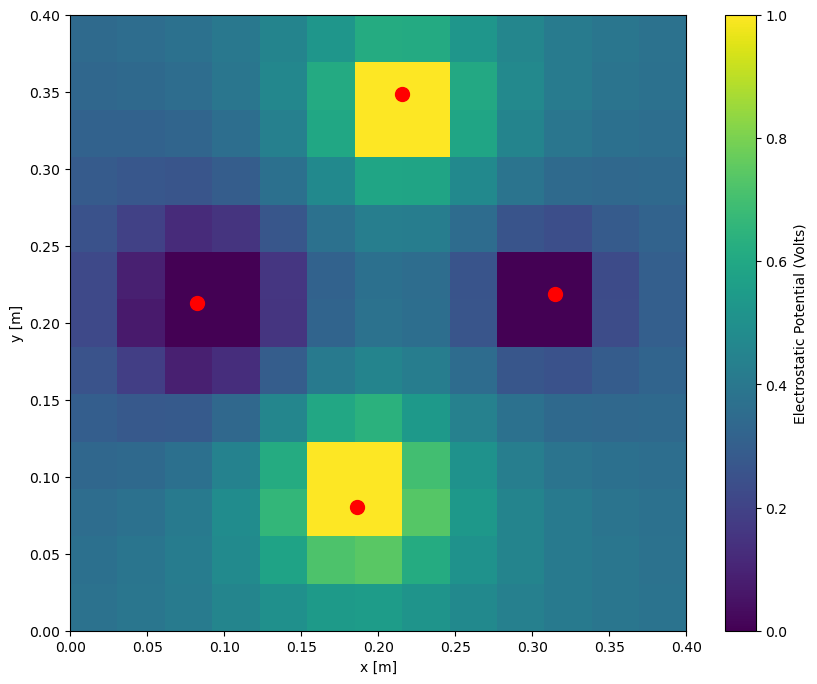

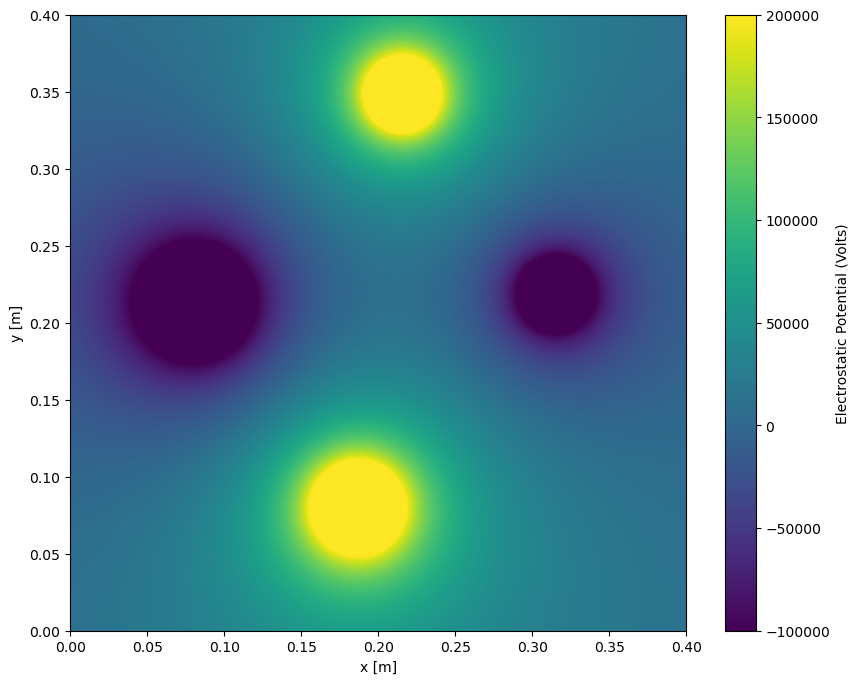

In [1]:
# importing modules/libraries:
from astropy.constants import eps0
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# importing/reading the data sets:
v_data = np.loadtxt("project1_data_potential.csv", delimiter = ",", skiprows = 1)
x_data = np.loadtxt("project1_data_x.csv", delimiter = ",", skiprows = 1)
y_data = np.loadtxt("project1_data_y.csv", delimiter = ",", skiprows = 1)

# plotting V (x, y) as a heat map:
plt.figure(figsize=(10,8))
plt.imshow(v_data,
             origin='lower',
#            vmin = -100000, vmax = 200000,
            extent=(x_data.min(), #left 
                    x_data.max(), #right
                    y_data.min(), #bottom
                    y_data.max()) #top
 )
cbar = plt.colorbar() # color bar
cbar.set_label("Electrostatic Potential (Volts)") # labeling color bar
plt.xlabel('x [m]') # x label
plt.ylabel('y [m]') # y label
plt.savefig("original potential")
plt.show()

# Defining potential function:
def potential(dat, *params):
    x,y = dat
    
    a = (1/(4*np.pi*eps0.value))
    return a*((params[0]/np.sqrt((x-params[1])**2 + (y-params[2])**2)) +
            (params[3]/np.sqrt((x-params[4])**2 + (y-params[5])**2)) +
            (params[6]/np.sqrt((x-params[7])**2 + (y-params[8])**2)) +
            (params[9]/np.sqrt((x-params[10])**2 + (y-params[11])**2)))

v = v_data.flatten()
x = x_data.flatten()
y = y_data.flatten()

q = 5.5e-7
# Initial guess:
initial_guess = [q, 6, 10, -q, 9, 6,-q, 2, 6, q, 5, 2]

for i in range(len(initial_guess)):

    if abs(initial_guess[i]) == 5.5e-7:
        pass
    else:
        initial_guess[i] = initial_guess[i]*(0.4/12) + 0.5*(0.4/12)
        
# Curve_fitting:
fit = curve_fit(potential, (x, y), v, p0 = initial_guess, maxfev = int(1e8) )

# uncertainties/Errors:
uncert = np.sqrt(np.diag(fit[1]))

# Optimized parameters:   
opt_params = fit[0]

plt.figure(figsize=(10,8))
plt.imshow(v_data, origin='lower',
           vmin = -100000, vmax = 200000,
           extent=(x_data.min(), #left 
                   x_data.max(), #right
                   y_data.min(), #bottom
                   y_data.max()) #top
)
# scatter plot optimized position parameters:
plt.scatter(opt_params[1], opt_params[2], color = "red", s = 100)
plt.scatter(opt_params[4], opt_params[5], color = "red", s = 100)
plt.scatter(opt_params[7], opt_params[8], color = "red", s = 100)
plt.scatter(opt_params[10], opt_params[11], color = "red", s = 100)

cbar = plt.colorbar()
cbar.set_label("Electrostatic Potential (Volts)")
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.savefig("opt_params_potential")
plt.show()

x_data = np.linspace(x.min(), x.max(), 1000)
y_data = np.linspace(y.min(), y.max(), 1000)

X, Y = np.meshgrid(x_data, y_data)

v_smooth = potential((X, Y), *opt_params)

v_smooth = v_smooth.reshape(X.shape)

v_smooth.reshape(X.shape)

# for m in range(-200_000, 200_000, 10_000):
plt.figure(figsize=(10,8))

plt.imshow(v_smooth,
             extent=(x_data.min(), #left 
                    x_data.max(), #right
                    y_data.min(), #bottom
                    y_data.max()) #top
             , origin = "lower",
            vmin = -100_000, vmax = 200_000
             # vmin = -100000+m, vmax = 200000-m,
             )
cbar = plt.colorbar()
cbar.set_label("Electrostatic Potential (Volts)")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.savefig("smooth potential")
plt.show()



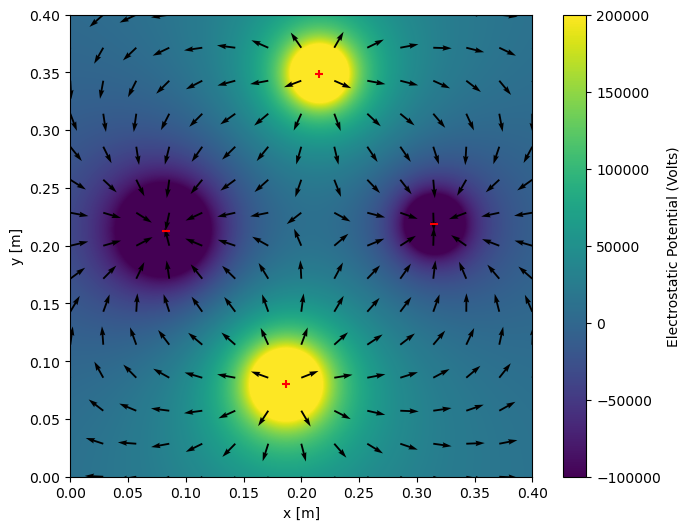

In [2]:
# Electric field function:
def E(x, y, *param):
    a = (1/(4*np.pi*eps0.value))
    r_A = (np.sqrt((x-param[1])**2 + (y-param[2])**2))**3 
    r_B = (np.sqrt((x-param[4])**2 + (y-param[5])**2))**3
    r_C = (np.sqrt((x-param[7])**2 + (y-param[8])**2))**3
    r_D = (np.sqrt((x-param[10])**2 + (y-param[11])**2))**3
    # Electric field x-component:
    E_x = a*(param[0]*(x-param[1])/r_A + param[3]*(x-param[4])/r_B
             + param[6]*(x-param[7])/r_C + param[9]*(x-param[10])/r_D)
    # Electric field y-component:
    E_y = a*(param[0]*(y-param[2])/r_A + param[3]*(y-param[5])/r_B
             + param[6]*(y-param[8])/r_C + param[9]*(y-param[11])/r_D)
    return E_x, E_y

x_data = np.linspace(x_data.min(), x_data.max(), 15)
y_data = np.linspace(y_data.min(), y_data.max(), 15)

# Generate grid points
X, Y = np.meshgrid(x_data, y_data)
X, Y = X.flatten(), Y.flatten()
# Calculate electric field components at each grid point

x_field, y_field = E(X, Y, *opt_params)

# Normalising the Electric field:
field_tot = np.sqrt(x_field**2 + y_field**2)

# Normalising x_field:
x_Norm_field = x_field/field_tot
# Normalising y_field:
y_Norm_field = y_field/field_tot

# Plot electric field lines
plt.figure(figsize=(8, 6))
plt.imshow(v_smooth,
             extent=(x_data.min(), #left 
                    x_data.max(), #right
                    y_data.min(), #bottom
                    y_data.max()) #top
             , origin = "lower",
            vmin = -100_000, vmax = 200_000
             # vmin = -100000+m, vmax = 200000-m,
             )
cbar = plt.colorbar()
cbar.set_label("Electrostatic Potential (Volts)")
plt.quiver(X, Y, x_Norm_field, y_Norm_field, scale = 25)  # Adjust the scale value as needed
# plotting the points:
plt.scatter(opt_params[1], opt_params[2], color = "red", marker = "+")
plt.scatter(opt_params[4], opt_params[5], color = "red", marker = "_")
plt.scatter(opt_params[7], opt_params[8], color = "red", marker = "_")
plt.scatter(opt_params[10], opt_params[11], color = "red", marker = "+")
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.savefig("Electric filed line")
plt.show()
